# Welcome to the `climate data tutorial` Jupyter Notebook

Jupyter Notebooks are a user-friendly web-based interface for programming languages, such as Python 3 which we use here. Notebooks are divided into `Markdown` cells containing text and equations, such as this one, and `code` cells containing our Python 3 code (see examples below). Play around with the toolbar above to learn the various ways to manipulate cells in your notebook. Select a cell by click on the white margin just to the left of the cell – the cell should be outlined in blue if you've done so correctly. Three very useful shortcuts for cells are:

`shift + return` which executes the selected cell

`m`, which turns the selected cell into a Markdown cell

`y`, which turns the selected cell into a code cell

Let's start with some basic Python commands in the `code` cell below:

In [1]:
# Use a hashtag before text to make it a comment so that it will be skipped when running the code
# We begin by defining two variables by integers 1 and 2
a = 1 
b = 2

# We define a third variable as the sum of our variables a and b
c = a+b

# Let's print the value of our new variable
print("c = "+str(c))

# It is often useful to create loops, which let you iteratively change the value of something and repeat operations
# For example, let us loop through the numbers 1 through 5 and print their squares
for x in range(1,6): # range(1,6) creates a range of numbers between 1 and 6, including 1 but excluding the endpoint 6
    print(str(x)+"**2 = "+str(x**2)) # In python, we use ** to denote exponential powers

c = 3
1**2 = 1
2**2 = 4
3**2 = 9
4**2 = 16
5**2 = 25


To do much more advanced things with Python, we need to import some modules, which are open-source libraries that contain advanced tools for doing things like advanced mathematics, data analysis, and plotting. Let's start by importing the `numpy` module, which stands for `numerical python`. We import the module `as np` as a shortcut so we don't have to type out `numpy` every time we use something from that module.

In [3]:
import numpy as np

Now that we've imported `numpy`, we can use it to create arrays, generate data, and use common mathematical functions.

In [4]:
x = np.arange(0,2*np.pi,0.01) # This creates a 1-dimensional array of values between 0 and 2*pi with a spacing of 0.01
y = np.sin(x) # This calculates the sin function, evaluated at the points of our x array.

# We can calculate the average of our newly defined function, which we expect to be zero
y_average = np.mean(y)
print("the average of y = sin(x) between 0 and 2*pi is "+str(y_average)+", a very small value\n")

# We can use three quotation marks to book-end a multi-line comment
"""
The whole x and y arrays are quite long so let's just print the first five values in each.
We use the brackets [ ] to index the array and 0:5 to denote that we only want to retrieve
the first five values. The fist value is denoted by the 0 index in Python (as opposed to 
1 in a programming language like Matlab) and 0:5 includes 0, 1, 2, 3, 4, but not the endpoint 5.
"""

print("x[0:5] = "+str(x[0:5])) 
print("y[0:5] = "+str(y[0:5]))

# Note that these values are approximately equal, which we can understand because y = x is the first order
# Taylor's series approximation for y = sin(x) in the vicinity of x = 0.

the average of y = sin(x) between 0 and 2*pi is -1.7255110678516413e-06, a very small value

x[0:5] = [0.   0.01 0.02 0.03 0.04]
y[0:5] = [0.         0.00999983 0.01999867 0.0299955  0.03998933]


Now that we've generated some data, let's import the `pyplot` submodule of the `matplotlib` module which lets us make all kinds of beautiful plots of our data. Play around with the arguments to the `pyplot` functions and see how you can manipulate the plot. Google `pyplot` and the name of the argument, like `linestyle` to learn how the arguments can be used.

Text(0.5, 1.0, 'Our first figure')

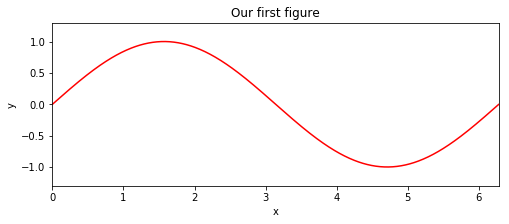

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,3)) # Sets the size of our figure
plt.plot(x,y,color="r",linestyle="-") # Plots our data
plt.xlim([-0,2*np.pi]) # Fixes the plot's endpoints in the x direction
plt.ylim([-1.3,1.3]) # Fixes the plot's endpoints in the y direction
plt.xlabel('x') # Label the x-axis
plt.ylabel('y') # Label the y-axis
plt.title("Our first figure") # Give the plot a title

Now, let's use `numpy` to generate a two-dimensional signal and use `pyplot` to plot a two-dimensional heat map of the signal's value.

shape of x: (1, 126)
shape of y: (126, 1)
shape of z: (126, 126)


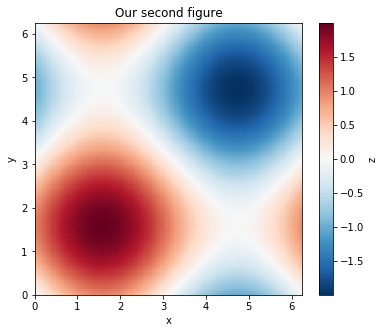

In [6]:
# We can index a one-dimensional array with [:,np.newaxis] to create a yet-undefined second dimension
# The second dimension will start with a size of 1 until it is determined at a later time.
x = np.arange(0,2*np.pi,0.05)[np.newaxis,:] 
y = np.arange(0,2*np.pi,0.05)[:,np.newaxis]

print("shape of x: "+str(x.shape))
print("shape of y: "+str(y.shape))

z = np.sin(x)+np.sin(y)
print("shape of z: "+str(z.shape))

plt.figure(figsize=(6,5))
plt.xlabel("x") # label axis
plt.ylabel("y") # label axis
plt.title("Our second figure") # title
# I don't like the default colors so let's change the colormap to Blue-Red
plt.pcolor(x,y,z,cmap=plt.get_cmap("RdBu_r"))
plt.colorbar(label="z") # add a colorbar to show what values of z the colors correspond to

# Loading climate data

In the training exercises above, you dealt with simulated variables that we created using `numpy` functions. Now, we use a more conventional `.nc` netCDF4 data format which lets you add dimensions and meta data (like a variable name, description, and units) to `numpy` arrays. Our variable name `SAT` stands for Surface Air Temperature and contains three dimensions: `time`, `longitude`, and `latitude`.

We use `import netCDF4 as nc` and use the function `nc.Dataset` to read in our `OBS_BerkeleyEarth_2008-2017.nc` netCDF4 file.

`print(f.variables)` will show a list of all the variables.

In [7]:
import netCDF4 as nc

f=nc.Dataset("OBS_BerkeleyEarth_2008-2017.nc") # we load the dataset

time = f["time"][:] # We load in the full time variable
lon = f["longitude"][:] # We load in the full longitude variable
lat = f["latitude"][:] # We load in the full latitude variable
SAT = f["SAT"][:,:,:] # We load in the full surface air temperature variable (note that it has three dimensions)

print("The units of time are "+f["time"].units)
print("Note that months are given by a fraction of the year, expressed as a decimal:")
print(time[0:12][:,np.newaxis])

The units of time are years AD
Note that months are given by a fraction of the year, expressed as a decimal:
[[2008.04243669]
 [2008.12354552]
 [2008.20465435]
 [2008.2881588 ]
 [2008.37166324]
 [2008.45516769]
 [2008.53867214]
 [2008.62354552]
 [2008.70704997]
 [2008.79055441]
 [2008.87405886]
 [2008.95756331]]


Let's plot the `surface air temperature` variable denoted by `SAT`. Since it is a three-dimensional variable, we will have to subsample it along one of the dimensions in order to make a two-dimensional plot. Let's plot the January 2008 temperature.

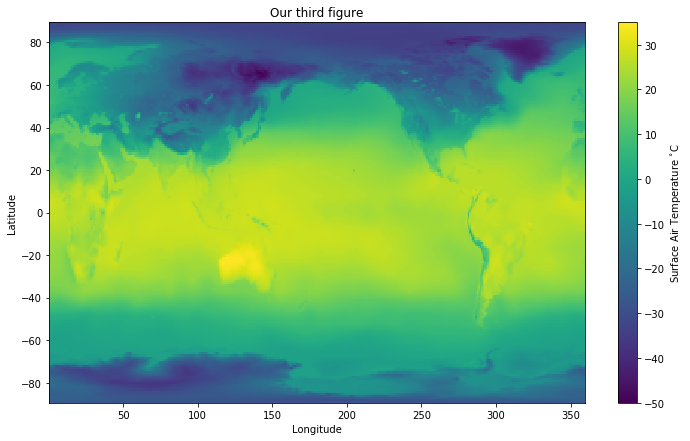

In [8]:
plt.figure(figsize=(12,7))
plt.title("Our third figure")
plt.pcolor(lon,lat,SAT[0,:,:])
plt.colorbar(label=r"Surface Air Temperature $^{\circ}$C")
# We use r before the string so that we can use latex notation
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.clim([-50,35])

# Exercise

Using the tools you have learned so far, make three plots of the global surface air temperature patterns:

1) the average surface air temperature in the year 2008

2) the surface air temperature in December 2014

3) the average difference in surface air temperature between DJF and JJA across the whole ten-year period


In [94]:
# Write code for exercise in this code cell